In [1]:
import sys
import os 
import subprocess
from datetime import datetime
import numpy as np 
import glob
import matplotlib.pyplot as plt
import tensorflow as tf 

In [2]:
sys.path.append('../src/CTA-data-analisis-library/')

In [3]:
import unzipdata_and_first_treatments as manipulate
import loaddata4use

## Parte de preprocesado

In [5]:
dir(manipulate)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'datetime',
 'dif_dt_txt',
 'dt_2_npy',
 'extract_multiple_tar',
 'extract_single_tar',
 'glob',
 'gzip',
 'lista_dt',
 'lista_txt',
 'multiple_dt_2_npy',
 'np',
 'os',
 'pd',
 're',
 'tarfile',
 'unzip_gunzip']

In [5]:
#primero tenemos que listar los ficheros que vamos a convertir a npy
#pasamos una lista de los .dt y el directorio de npy's.

npy_final_dir="../datos/elementos_npy"
base_dir_elementos="../datos/elementos"

elementos=["proton","electron","helium","iron","nitrogen","silicon","gamma"]
#manipulate.dt_2_npy(base_dir_elementos,npy_final_dir,elementos,verbose=True)


"""
for i,name in enumerate(elementos):
    element_complete_dir=os.path.join(base_dir_elementos,name)
    element_npy_final_dir=os.path.join(npy_final_dir,f"{name}_npy")
    lista_archivos=manipulate.lista_dt(element_complete_dir)
    manipulate.multiple_dt_2_npy(lista_archivos,element_npy_final_dir)
"""

proton /home/arturoSF/datos/elementos/extract_proton/proton_tel_1_run_001.dt
proton /home/arturoSF/datos/elementos/extract_proton/proton_tel_1_run_002.dt
proton /home/arturoSF/datos/elementos/extract_proton/proton_tel_1_run_003.dt
proton /home/arturoSF/datos/elementos/extract_proton/proton_tel_1_run_004.dt
proton /home/arturoSF/datos/elementos/extract_proton/proton_tel_1_run_005.dt
proton /home/arturoSF/datos/elementos/extract_proton/proton_tel_1_run_006.dt
proton /home/arturoSF/datos/elementos/extract_proton/proton_tel_1_run_007.dt
proton /home/arturoSF/datos/elementos/extract_proton/proton_tel_1_run_008.dt
proton /home/arturoSF/datos/elementos/extract_proton/proton_tel_1_run_009.dt
proton /home/arturoSF/datos/elementos/extract_proton/proton_tel_1_run_010.dt
proton /home/arturoSF/datos/elementos/extract_proton/proton_tel_1_run_011.dt
proton /home/arturoSF/datos/elementos/extract_proton/proton_tel_1_run_012.dt
proton /home/arturoSF/datos/elementos/extract_proton/proton_tel_1_run_013.dt

electron /home/arturoSF/datos/elementos/extract_electron/electron_tel_3_run_028.dt
electron /home/arturoSF/datos/elementos/extract_electron/electron_tel_3_run_029.dt
electron /home/arturoSF/datos/elementos/extract_electron/electron_tel_3_run_030.dt
electron /home/arturoSF/datos/elementos/extract_electron/electron_tel_3_run_031.dt
electron /home/arturoSF/datos/elementos/extract_electron/electron_tel_3_run_032.dt
electron /home/arturoSF/datos/elementos/extract_electron/electron_tel_3_run_033.dt
electron /home/arturoSF/datos/elementos/extract_electron/electron_tel_3_run_034.dt
electron /home/arturoSF/datos/elementos/extract_electron/electron_tel_3_run_035.dt
electron /home/arturoSF/datos/elementos/extract_electron/electron_tel_3_run_036.dt
electron /home/arturoSF/datos/elementos/extract_electron/electron_tel_3_run_037.dt
electron /home/arturoSF/datos/elementos/extract_electron/electron_tel_3_run_038.dt
electron /home/arturoSF/datos/elementos/extract_electron/electron_tel_3_run_039.dt
elec

helium /home/arturoSF/datos/elementos/extract_helium/helium_tel_4_run_026.dt
helium /home/arturoSF/datos/elementos/extract_helium/helium_tel_4_run_027.dt
helium /home/arturoSF/datos/elementos/extract_helium/helium_tel_4_run_028.dt
helium /home/arturoSF/datos/elementos/extract_helium/helium_tel_4_run_029.dt
helium /home/arturoSF/datos/elementos/extract_helium/helium_tel_4_run_030.dt
helium /home/arturoSF/datos/elementos/extract_helium/helium_tel_4_run_031.dt
helium /home/arturoSF/datos/elementos/extract_helium/helium_tel_4_run_032.dt
helium /home/arturoSF/datos/elementos/extract_helium/helium_tel_4_run_033.dt
helium /home/arturoSF/datos/elementos/extract_helium/helium_tel_4_run_034.dt
helium /home/arturoSF/datos/elementos/extract_helium/helium_tel_4_run_035.dt


KeyboardInterrupt: 

In [8]:
datetime.now().strftime("%H:%M:%S")

'02:34:31'

# Representación datos

In [11]:
#cargamos los datos 
npy_dir="/home/arturoSF/datos/elementos_npy/npy_proton/npy*.npy"
lista_npy=glob.glob(npy_dir)

In [12]:
data=np.load(lista_npy[1])

/home/arturoSF/datos/elementos_npy/npy_proton/npy_sin_normal_proton_tel_1_run_002_0.npy (487, 93, 55)


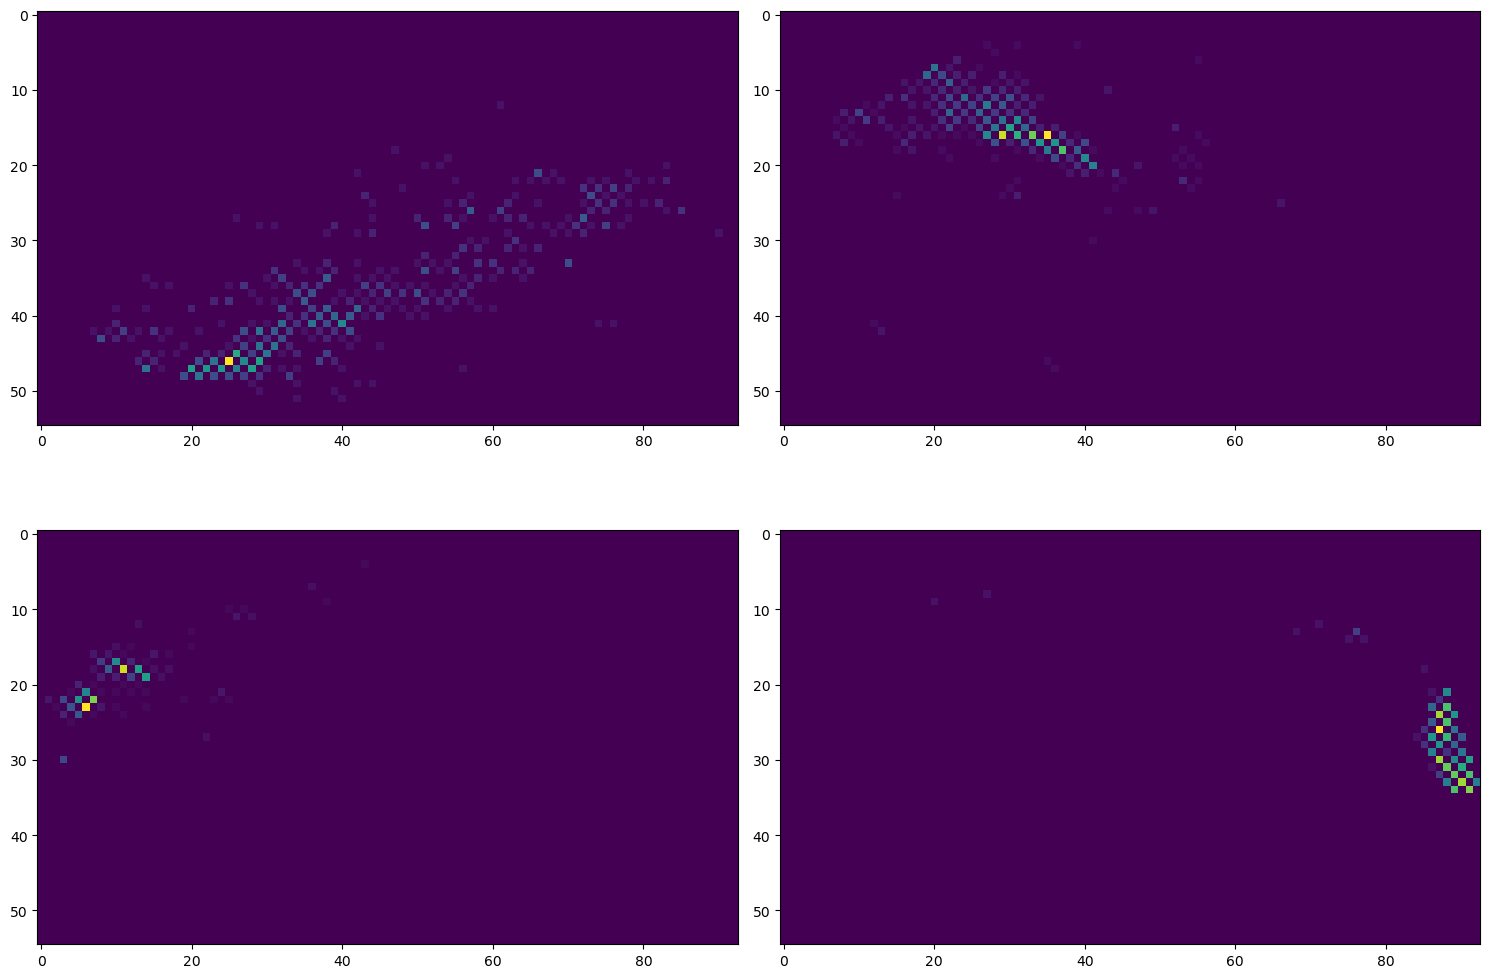

In [13]:
print(lista_npy[1],data.shape)
plt.figure(figsize=(15,11))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(data[i].T)
plt.tight_layout()

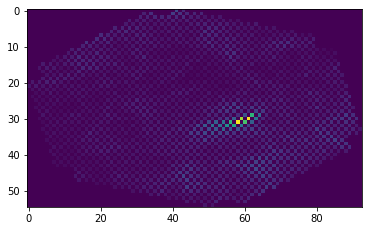

In [46]:
plt.imshow(data.sum(axis=0).T)

# Creamos bucles para el entrenamiento sistematico  
Esto incluye la carga de datos una vez (o varias si no nos cabe en memoria). Y luego el entrenamiento recursivo de modelos con diferentes parámetros. 

Tenemos que automatizar y hacer un buen control de errores en: 

    - Carga de datos.  
        - La carga y el creado de barches etc.  
    - Entrenamiento de modelos.  
    - Sacar las metricas oportunas.  

### Primera parte: Crear bucle carga de datos 

Vamos a tener en cuenta:  
1. Que los datos se carge en memoria todos si caben.  
2. Crear diferentes labels, para poder probar las diferentes opciones de agrupación.
    - Lo hacemos para probar cual es la mejor agrupación. 
    
**El tema de diferentes labels lo ponemos pendiente, por ahora tiramos con las que sabemos que funcionan, que son:**  
- Gamma  
- Electron  
- Hadrones

No se cuantos datos puedo cargar en memoría, así que vamos a poner algun temporal.

In [4]:
npy_final_dir="../datos/elementos_npy"
base_dir_elementos="../datos/elementos"

elementos=["proton","electron","helium","iron","nitrogen","silicon","gamma"]

In [5]:
# parte de la carga de datos para el modelo  

elements=['gamma', 'electron', 'proton', 'helium', 'iron', 'nitrogen', 'silicon']
list_runs=loaddata4use.create_main_list_runs(num_events=2,init_events=4)
list_runs

array([[4, 5],
       [4, 5],
       [4, 5],
       [4, 5],
       [4, 5],
       [4, 5],
       [4, 5]], dtype=object)

In [6]:
data_aux=loaddata4use.load_dataset_completo(npy_final_dir,labels_asign=[0,1,2,2,2,2,2],elements=elements,main_list_runs=list_runs,
                      pre_name_folders="npy_",telescopes=[1],test_size=0.2,same_quant="same",verbose=True,fill=True,categorical=True)

Load of names and common events
_______________
Element:  gamma , Telescope:  4 , Runs:  [4 5]  Shape of common events (tels,common events):  (1, 2254)
Element:  gamma , Telescope:  5 , Runs:  [4 5]  Shape of common events (tels,common events):  (1, 2311)
Element:  electron , Telescope:  4 , Runs:  [4 5]  Shape of common events (tels,common events):  (1, 558)
Element:  electron , Telescope:  5 , Runs:  [4 5]  Shape of common events (tels,common events):  (1, 581)
Element:  proton , Telescope:  4 , Runs:  [4 5]  Shape of common events (tels,common events):  (1, 501)
Element:  proton , Telescope:  5 , Runs:  [4 5]  Shape of common events (tels,common events):  (1, 498)
Element:  helium , Telescope:  4 , Runs:  [4 5]  Shape of common events (tels,common events):  (1, 644)
Element:  helium , Telescope:  5 , Runs:  [4 5]  Shape of common events (tels,common events):  (1, 626)
Element:  iron , Telescope:  4 , Runs:  [4 5]  Shape of common events (tels,common events):  (1, 491)
Element:  iron

(array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

In [ ]:
opciones_filtros=[
    [[12,16],[32,64],[64,12]],
    [[12,16,32],[64,128],[128,64,32]],
    [[12,16],[32,64],[64,12]],
    [[12,16],[32,64],[64,12]],
    [[12,16],[32,64],[64,12]]
]

In [ ]:
# parte de la creacion de los modelos con diferentes hiperparámetros

model=model_multi_tel(len_inputs=4,input_shapes=[(55,93,1)],classes=7,learning_rate=1e-5,pre_proces_model=None,
                      filtros=[[12,16],[32,64],[64,12]],last_dense=[60,40],autoencoder=None,common_pre=True,batch=False)

In [19]:
import psutil

In [30]:
psutil.virtual_memory().total / (1024.0 ** 3)


7.585643768310547